In [9]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import json
import numpy as np

# open files
df_hdiy = pd.read_csv('../data/cleaned_hdi_py_data.csv')

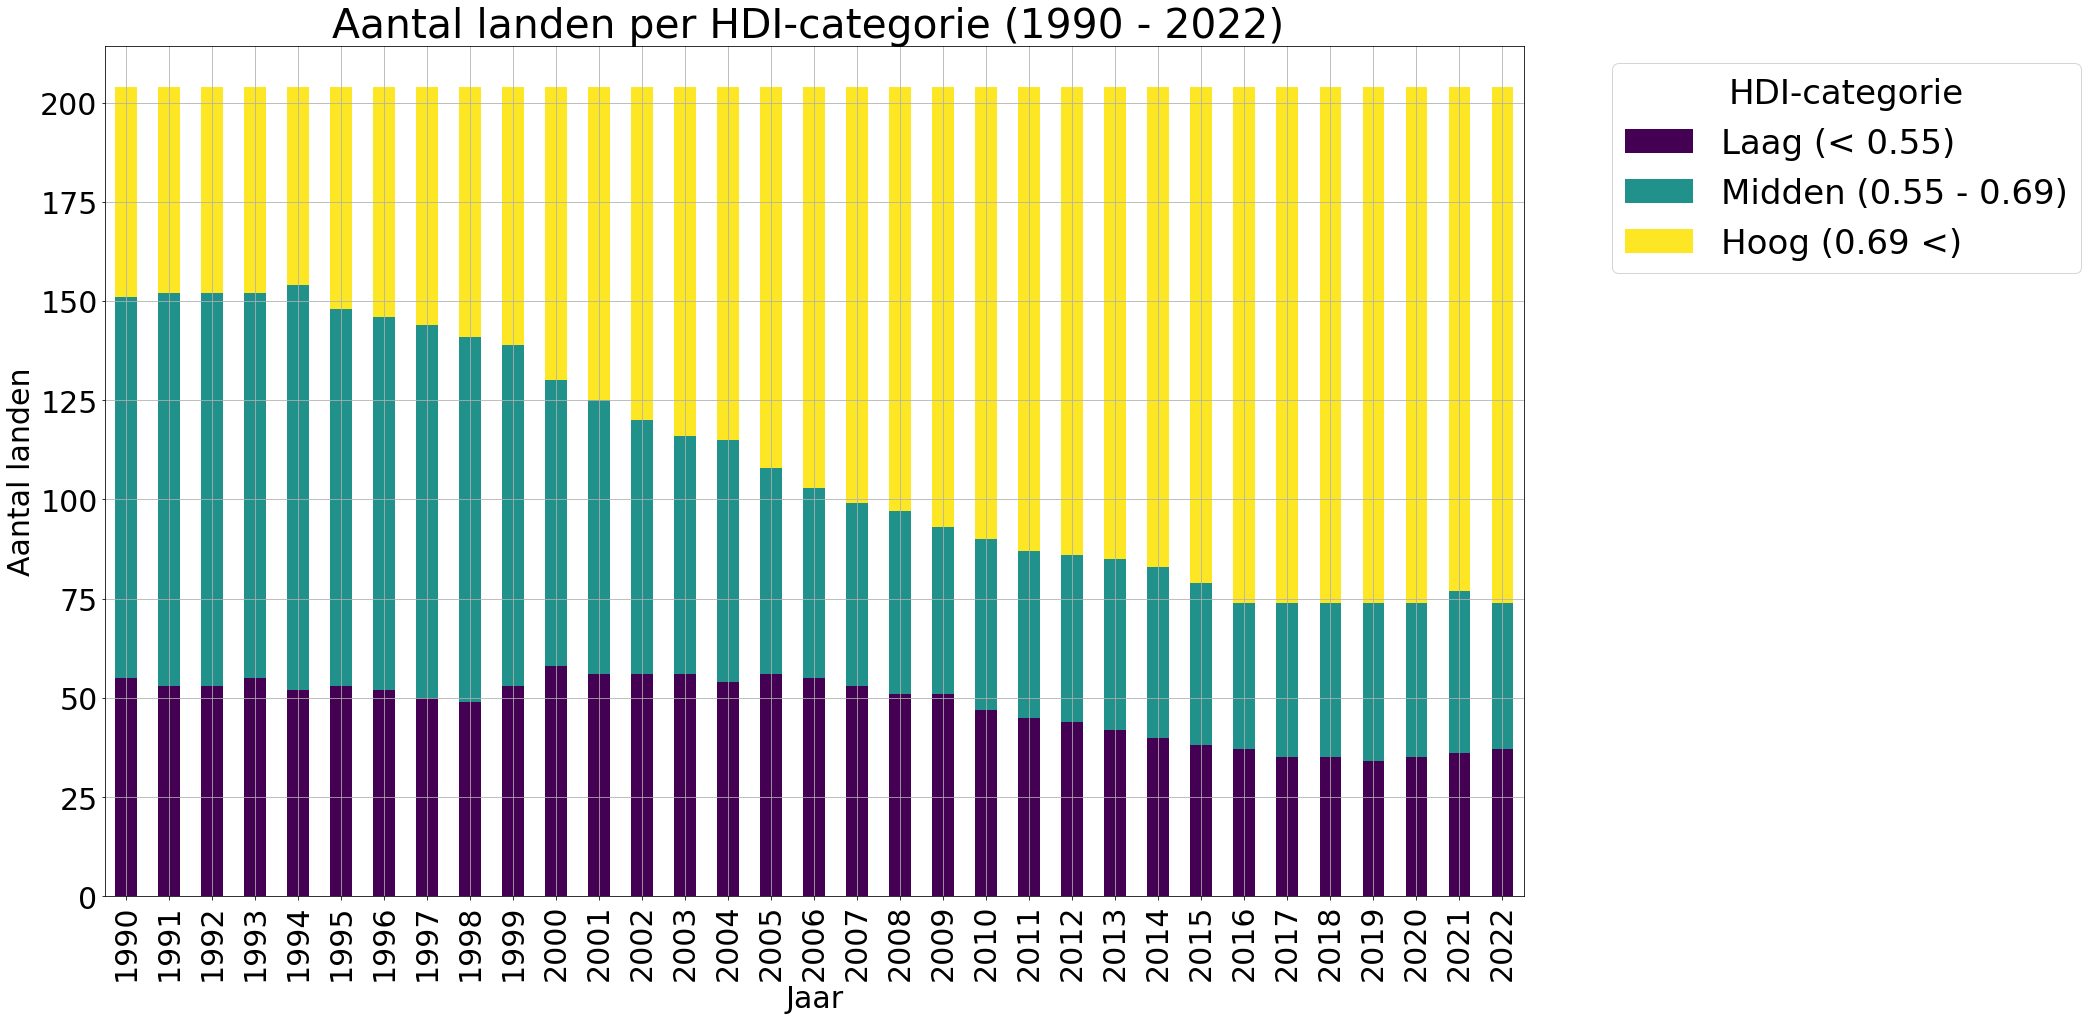

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Veronderstel dat df_hdiy al is gedefinieerd en geladen
# years en hdi_columns definieren
years = list(range(1990, 2023))
hdi_columns = [f'hdi_{year}' for year in years]
df_hdiyn = df_hdiy[['country'] + hdi_columns]

# DataFrame smelten naar lang formaat voor eenvoudiger plotten
df_melted = df_hdiyn.melt(id_vars=['country'], var_name='year', value_name='hdi')

# Jaar naar numeriek omzetten
df_melted['year'] = df_melted['year'].str.extract('(\d+)').astype(int)

# Bins en labels definiëren voor HDI-categorieën
bins = [0, 0.55, 0.69, 1.0]
labels = ['Laag (< 0.55)', 'Midden (0.55 - 0.69)', 'Hoog (0.69 <)']

# HDI-waarden in categorieën indelen
df_melted['category'] = pd.cut(df_melted['hdi'], bins=bins, labels=labels, include_lowest=True)

# Groeperen op categorie
df_grouped = df_melted.groupby(['year', 'category'], observed=True).size().unstack(fill_value=0)

# Staafdiagram plotten
df_grouped.plot(kind='bar', stacked=True, figsize=(30, 15), colormap='viridis')

# Lettergrootte instellen
plt.rc('font', size=34)
plt.title('Aantal landen per HDI-categorie (1990 - 2022) ')
plt.xlabel('Jaar')
plt.ylabel('Aantal landen')
plt.legend(title='HDI-categorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
